<a href="https://colab.research.google.com/github/Dannie401/CODE-KATA/blob/main/test1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [95]:
# @title
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [96]:
import pandas as pd
import glob
import os
# Colab에서 구글 드라이브에 접근하기 위해 필요
from google.colab import drive

# 1. 📂 구글 드라이브 마운트
# 이 코드를 먼저 실행하고 구글 계정에 연결해야 파일에 접근 가능합니다.
drive.mount('/content/drive')

# 2. 📍 파일 경로 설정
data_path = '/content/drive/MyDrive/데이터 분석/최종 프로젝트'

# 3. 📄 파일 목록 찾기 (지정된 경로 안에서 CSV 파일 찾기)
file_list = glob.glob(os.path.join(data_path, 'olist_*.csv')) + \
            glob.glob(os.path.join(data_path, 'product_*.csv'))

print(f"✅ 찾은 파일 목록: {file_list}\n")

summary_data = {}

# 4. 📊 각 파일별로 반복하며 분석 및 결과 출력
for file_path in file_list:
    file_name = os.path.basename(file_path)

    try:
        df = pd.read_csv(file_path)

        print(f"\n--- 📁 파일: {file_name} (상위 5개 행) ---")
        display(df.head()) # 데이터 예시

        summary = []
        for col in df.columns:
            # 결측치 정보
            null_count = df[col].isnull().sum()
            null_ratio = (null_count / len(df)) * 100

            # 고유값 정보
            unique_count = df[col].nunique()

            # 고유값 5개 예시
            unique_samples = df[col].dropna().unique()
            sample_values = list(unique_samples[:5])
            sample_str = ', '.join(map(str, sample_values))

            summary.append({
                '컬럼 이름': col,
                '데이터 타입': str(df[col].dtype),
                'NULL 개수': null_count,
                'NULL 비율 (%)': f'{null_ratio:.2f}',
                '고유값 개수': unique_count,
                '고유값 예시 5개': sample_str
            })

        summary_df = pd.DataFrame(summary)
        summary_data[file_name] = summary_df

    except Exception as e:
        print(f"⚠️ {file_name} 파일 처리 중 오류 발생: {e}")

# 5. 📜 전체 요약 결과 출력
print("\n\n--- 📜 컬럼별 상세 요약 결과 (정의서 기초 자료) ---")
for file_name, df in summary_data.items():
    print(f"\n### 파일: {file_name}")
    display(df)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
✅ 찾은 파일 목록: ['/content/drive/MyDrive/데이터 분석/최종 프로젝트/olist_closed_deals_dataset.csv', '/content/drive/MyDrive/데이터 분석/최종 프로젝트/olist_order_items_dataset.csv', '/content/drive/MyDrive/데이터 분석/최종 프로젝트/olist_order_payments_dataset.csv', '/content/drive/MyDrive/데이터 분석/최종 프로젝트/olist_customers_dataset.csv', '/content/drive/MyDrive/데이터 분석/최종 프로젝트/olist_geolocation_dataset.csv', '/content/drive/MyDrive/데이터 분석/최종 프로젝트/olist_sellers_dataset.csv', '/content/drive/MyDrive/데이터 분석/최종 프로젝트/olist_orders_dataset.csv', '/content/drive/MyDrive/데이터 분석/최종 프로젝트/olist_products_dataset.csv', '/content/drive/MyDrive/데이터 분석/최종 프로젝트/olist_order_reviews_dataset.csv', '/content/drive/MyDrive/데이터 분석/최종 프로젝트/olist_marketing_qualified_leads_dataset.csv', '/content/drive/MyDrive/데이터 분석/최종 프로젝트/product_category_name_translation.csv']


--- 📁 파일: olist_closed_deals_dataset.csv (상위 5개 행) ---


,mql_id,seller_id,sdr_id,sr_id,won_date,business_segment,lead_type,lead_behaviour_profile,has_company,has_gtin,average_stock,business_type,declared_product_catalog_size,declared_monthly_revenue
0,5420aad7fec3549a85876ba1c529bd84,2c43fb513632d29b3b58df74816f1b06,a8387c01a09e99ce014107505b92388c,4ef15afb4b2723d8f3d81e51ec7afefe,2018-02-26 19:58:54,pet,online_medium,cat,NaN,NaN,NaN,reseller,NaN,0.0
1,a555fb36b9368110ede0f043dfc3b9a0,bbb7d7893a450660432ea6652310ebb7,09285259593c61296eef10c734121d5b,d3d1e91a157ea7f90548eef82f1955e3,2018-05-08 20:17:59,car_accessories,industry,eagle,NaN,NaN,NaN,reseller,NaN,0.0
2,327174d3648a2d047e8940d7d15204ca,612170e34b97004b3ba37eae81836b4c,b90f87164b5f8c2cfa5c8572834dbe3f,6565aa9ce3178a5caf6171827af3a9ba,2018-06-05 17:27:23,home_appliances,online_big,cat,NaN,NaN,NaN,reseller,NaN,0.0
3,f5fee8f7da74f4887f5bcae2bafb6dd6,21e1781e36faf92725dde4730a88ca0f,56bf83c4bb35763a51c2baab501b4c67,d3d1e91a157ea7f90548eef82f1955e3,2018-01-17 13:51:03,food_drink,online_small,NaN,NaN,NaN,NaN,reseller,NaN,0.0
4,ffe640179b554e295c167a2f6be528e0,ed8cb7b190ceb6067227478e48cf8dde,4b339f9567d060bcea4f5136b9f5949e,d3d1e91a157ea7f90548eef82f1955e3,2018-07-03 20:17:45,home_appliances,industry,wolf,NaN,NaN,NaN,manufacturer,NaN,0.0



--- 📁 파일: olist_order_items_dataset.csv (상위 5개 행) ---


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14



--- 📁 파일: olist_order_payments_dataset.csv (상위 5개 행) ---


,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45



--- 📁 파일: olist_customers_dataset.csv (상위 5개 행) ---


,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP



--- 📁 파일: olist_geolocation_dataset.csv (상위 5개 행) ---


,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP



--- 📁 파일: olist_sellers_dataset.csv (상위 5개 행) ---


,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP



--- 📁 파일: olist_orders_dataset.csv (상위 5개 행) ---


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00



--- 📁 파일: olist_products_dataset.csv (상위 5개 행) ---


,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0



--- 📁 파일: olist_order_reviews_dataset.csv (상위 5개 행) ---


,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53



--- 📁 파일: olist_marketing_qualified_leads_dataset.csv (상위 5개 행) ---


,mql_id,first_contact_date,landing_page_id,origin
0,dac32acd4db4c29c230538b72f8dd87d,2018-02-01,88740e65d5d6b056e0cda098e1ea6313,social
1,8c18d1de7f67e60dbd64e3c07d7e9d5d,2017-10-20,007f9098284a86ee80ddeb25d53e0af8,paid_search
2,b4bc852d233dfefc5131f593b538befa,2018-03-22,a7982125ff7aa3b2054c6e44f9d28522,organic_search
3,6be030b81c75970747525b843c1ef4f8,2018-01-22,d45d558f0daeecf3cccdffe3c59684aa,email
4,5420aad7fec3549a85876ba1c529bd84,2018-02-21,b48ec5f3b04e9068441002a19df93c6c,organic_search



--- 📁 파일: product_category_name_translation.csv (상위 5개 행) ---


,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor




--- 📜 컬럼별 상세 요약 결과 (정의서 기초 자료) ---

### 파일: olist_closed_deals_dataset.csv


,컬럼 이름,데이터 타입,NULL 개수,NULL 비율 (%),고유값 개수,고유값 예시 5개
0,mql_id,object,0,0.00,842,"5420aad7fec3549a85876ba1c529bd84, a555fb36b936..."
1,seller_id,object,0,0.00,842,"2c43fb513632d29b3b58df74816f1b06, bbb7d7893a45..."
2,sdr_id,object,0,0.00,32,"a8387c01a09e99ce014107505b92388c, 09285259593c..."
3,sr_id,object,0,0.00,22,"4ef15afb4b2723d8f3d81e51ec7afefe, d3d1e91a157e..."
4,won_date,object,0,0.00,824,"2018-02-26 19:58:54, 2018-05-08 20:17:59, 2018..."
5,business_segment,object,1,0.12,33,"pet, car_accessories, home_appliances, food_dr..."
6,lead_type,object,6,0.71,8,"online_medium, industry, online_big, online_sm..."
7,lead_behaviour_profile,object,177,21.02,9,"cat, eagle, wolf, shark, cat, wolf"
8,has_company,object,779,92.52,2,"True, False"
9,has_gtin,object,778,92.40,2,"True, False"



### 파일: olist_order_items_dataset.csv


,컬럼 이름,데이터 타입,NULL 개수,NULL 비율 (%),고유값 개수,고유값 예시 5개
0,order_id,object,0,0.00,98666,"00010242fe8c5a6d1ba2dd792cb16214, 00018f77f2f0..."
1,order_item_id,int64,0,0.00,21,"1, 2, 3, 4, 5"
2,product_id,object,0,0.00,32951,"4244733e06e7ecb4970a6e2683c13e61, e5f2d52b8021..."
3,seller_id,object,0,0.00,3095,"48436dade18ac8b2bce089ec2a041202, dd7ddc04e1b6..."
4,shipping_limit_date,object,0,0.00,93318,"2017-09-19 09:45:35, 2017-05-03 11:05:13, 2018..."
5,price,float64,0,0.00,5968,"58.9, 239.9, 199.0, 12.99, 199.9"
6,freight_value,float64,0,0.00,6999,"13.29, 19.93, 17.87, 12.79, 18.14"



### 파일: olist_order_payments_dataset.csv


,컬럼 이름,데이터 타입,NULL 개수,NULL 비율 (%),고유값 개수,고유값 예시 5개
0,order_id,object,0,0.00,99440,"b81ef226f3fe1789b1e8b2acac839d17, a9810da82917..."
1,payment_sequential,int64,0,0.00,29,"1, 2, 4, 5, 3"
2,payment_type,object,0,0.00,5,"credit_card, boleto, voucher, debit_card, not_..."
3,payment_installments,int64,0,0.00,24,"8, 1, 2, 3, 6"
4,payment_value,float64,0,0.00,29077,"99.33, 24.39, 65.71, 107.78, 128.45"



### 파일: olist_customers_dataset.csv


,컬럼 이름,데이터 타입,NULL 개수,NULL 비율 (%),고유값 개수,고유값 예시 5개
0,customer_id,object,0,0.00,99441,"06b8999e2fba1a1fbc88172c00ba8bc7, 18955e83d337..."
1,customer_unique_id,object,0,0.00,96096,"861eff4711a542e4b93843c6dd7febb0, 290c77bc529b..."
2,customer_zip_code_prefix,int64,0,0.00,14994,"14409, 9790, 1151, 8775, 13056"
3,customer_city,object,0,0.00,4119,"franca, sao bernardo do campo, sao paulo, mogi..."
4,customer_state,object,0,0.00,27,"SP, SC, MG, PR, RJ"



### 파일: olist_geolocation_dataset.csv


,컬럼 이름,데이터 타입,NULL 개수,NULL 비율 (%),고유값 개수,고유값 예시 5개
0,geolocation_zip_code_prefix,int64,0,0.00,19015,"1037, 1046, 1041, 1035, 1012"
1,geolocation_lat,float64,0,0.00,717360,"-23.54562128115268, -23.54608112703553, -23.54..."
2,geolocation_lng,float64,0,0.00,717613,"-46.63929204800168, -46.64482029837157, -46.64..."
3,geolocation_city,object,0,0.00,8011,"sao paulo, são paulo, sao bernardo do campo, j..."
4,geolocation_state,object,0,0.00,27,"SP, RN, AC, RJ, ES"



### 파일: olist_sellers_dataset.csv


,컬럼 이름,데이터 타입,NULL 개수,NULL 비율 (%),고유값 개수,고유값 예시 5개
0,seller_id,object,0,0.00,3095,"3442f8959a84dea7ee197c632cb2df15, d1b65fc7debc..."
1,seller_zip_code_prefix,int64,0,0.00,2246,"13023, 13844, 20031, 4195, 12914"
2,seller_city,object,0,0.00,611,"campinas, mogi guacu, rio de janeiro, sao paul..."
3,seller_state,object,0,0.00,23,"SP, RJ, PE, PR, GO"



### 파일: olist_orders_dataset.csv


,컬럼 이름,데이터 타입,NULL 개수,NULL 비율 (%),고유값 개수,고유값 예시 5개
0,order_id,object,0,0.00,99441,"e481f51cbdc54678b7cc49136f2d6af7, 53cdb2fc8bc7..."
1,customer_id,object,0,0.00,99441,"9ef432eb6251297304e76186b10a928d, b0830fb4747a..."
2,order_status,object,0,0.00,8,"delivered, invoiced, shipped, processing, unav..."
3,order_purchase_timestamp,object,0,0.00,98875,"2017-10-02 10:56:33, 2018-07-24 20:41:37, 2018..."
4,order_approved_at,object,160,0.16,90733,"2017-10-02 11:07:15, 2018-07-26 03:24:27, 2018..."
5,order_delivered_carrier_date,object,1783,1.79,81018,"2017-10-04 19:55:00, 2018-07-26 14:31:00, 2018..."
6,order_delivered_customer_date,object,2965,2.98,95664,"2017-10-10 21:25:13, 2018-08-07 15:27:45, 2018..."
7,order_estimated_delivery_date,object,0,0.00,459,"2017-10-18 00:00:00, 2018-08-13 00:00:00, 2018..."



### 파일: olist_products_dataset.csv


,컬럼 이름,데이터 타입,NULL 개수,NULL 비율 (%),고유값 개수,고유값 예시 5개
0,product_id,object,0,0.00,32951,"1e9e8ef04dbcff4541ed26657ea517e5, 3aa071139cb1..."
1,product_category_name,object,610,1.85,73,"perfumaria, artes, esporte_lazer, bebes, utili..."
2,product_name_lenght,float64,610,1.85,66,"40.0, 44.0, 46.0, 27.0, 37.0"
3,product_description_lenght,float64,610,1.85,2960,"287.0, 276.0, 250.0, 261.0, 402.0"
4,product_photos_qty,float64,610,1.85,19,"1.0, 4.0, 2.0, 3.0, 5.0"
5,product_weight_g,float64,2,0.01,2204,"225.0, 1000.0, 154.0, 371.0, 625.0"
6,product_length_cm,float64,2,0.01,99,"16.0, 30.0, 18.0, 26.0, 20.0"
7,product_height_cm,float64,2,0.01,102,"10.0, 18.0, 9.0, 4.0, 17.0"
8,product_width_cm,float64,2,0.01,95,"14.0, 20.0, 15.0, 26.0, 13.0"



### 파일: olist_order_reviews_dataset.csv


,컬럼 이름,데이터 타입,NULL 개수,NULL 비율 (%),고유값 개수,고유값 예시 5개
0,review_id,object,0,0.00,98410,"7bc2406110b926393aa56f80a40eba40, 80e641a11e56..."
1,order_id,object,0,0.00,98673,"73fc7af87114b39712e6da79b0a377eb, a548910a1c61..."
2,review_score,int64,0,0.00,5,"4, 5, 1, 3, 2"
3,review_comment_title,object,87656,88.34,4527,"recomendo, Super recomendo, Não chegou meu pro..."
4,review_comment_message,object,58247,58.70,36159,"Recebi bem antes do prazo estipulado., Parabén..."
5,review_creation_date,object,0,0.00,636,"2018-01-18 00:00:00, 2018-03-10 00:00:00, 2018..."
6,review_answer_timestamp,object,0,0.00,98248,"2018-01-18 21:46:59, 2018-03-11 03:05:13, 2018..."



### 파일: olist_marketing_qualified_leads_dataset.csv


,컬럼 이름,데이터 타입,NULL 개수,NULL 비율 (%),고유값 개수,고유값 예시 5개
0,mql_id,object,0,0.00,8000,"dac32acd4db4c29c230538b72f8dd87d, 8c18d1de7f67..."
1,first_contact_date,object,0,0.00,336,"2018-02-01, 2017-10-20, 2018-03-22, 2018-01-22..."
2,landing_page_id,object,0,0.00,495,"88740e65d5d6b056e0cda098e1ea6313, 007f9098284a..."
3,origin,object,60,0.75,10,"social, paid_search, organic_search, email, un..."



### 파일: product_category_name_translation.csv


,컬럼 이름,데이터 타입,NULL 개수,NULL 비율 (%),고유값 개수,고유값 예시 5개
0,product_category_name,object,0,0.00,71,"beleza_saude, informatica_acessorios, automoti..."
1,product_category_name_english,object,0,0.00,71,"health_beauty, computers_accessories, auto, be..."


In [97]:
import pandas as pd
import glob
import os
from google.colab import drive

# (Drive 마운트는 한 번 했으므로 생략)
data_path = '/content/drive/MyDrive/데이터 분석/최종 프로젝트'

file_list = glob.glob(os.path.join(data_path, 'olist_*.csv')) + \
            glob.glob(os.path.join(data_path, 'product_*.csv'))

print("--- 🔍 데이터 중복 검사 결과 ---")

for file_path in file_list:
    file_name = os.path.basename(file_path)
    print(f"\n### 📁 파일: {file_name}")

    try:
        df = pd.read_csv(file_path)

        # 1. 📋 전체 행 중복 확인
        # (전체 컬럼 값이 완전히 똑같은 행이 몇 개인지 확인)
        total_duplicates = df.duplicated().sum()
        print(f"  - 전체 행 중복 개수: {total_duplicates}개")

        # 2. 🔑 핵심 ID 컬럼 중복 확인
        # (각 파일의 주요 ID 컬럼 리스트)
        if 'order_id' in df.columns:
            id_col = 'order_id'
        elif 'customer_unique_id' in df.columns:
            id_col = 'customer_unique_id'
        elif 'review_id' in df.columns:
            id_col = 'review_id'
        elif 'seller_id' in df.columns:
            id_col = 'seller_id'
        elif 'product_id' in df.columns:
            id_col = 'product_id'
        elif 'mql_id' in df.columns:
            id_col = 'mql_id'
        else:
            id_col = None

        if id_col:
            # ID 컬럼만 확인했을 때 중복되는 값의 개수
            id_duplicates = df[id_col].duplicated().sum()

            # 고유한 ID의 개수 (전체 행 개수와 비교)
            unique_ids = df[id_col].nunique()

            print(f"  - 주요 ID ({id_col}) 중복 개수: {id_duplicates}개")

            # 중요한 파일은 행 개수와 ID 개수를 비교하여 데이터 구조 이해
            if id_col in ['order_id', 'customer_unique_id', 'seller_id']:
                print(f"  - 전체 행 수: {len(df)}개, 고유 ID 수: {unique_ids}개")

                # 주문별로 여러 상품(아이템)이 있을 수 있는 경우를 설명
                if file_name == 'olist_order_items_dataset.csv' and id_duplicates > 0:
                    print(f"  - 💡 참고: 이 파일에서 'order_id' 중복은 한 주문에 여러 상품이 있다는 뜻입니다 (정상).")

    except Exception as e:
        print(f"⚠️ {file_name} 파일 처리 중 오류 발생: {e}")

--- 🔍 데이터 중복 검사 결과 ---

### 📁 파일: olist_closed_deals_dataset.csv
  - 전체 행 중복 개수: 0개
  - 주요 ID (seller_id) 중복 개수: 0개
  - 전체 행 수: 842개, 고유 ID 수: 842개

### 📁 파일: olist_order_items_dataset.csv
  - 전체 행 중복 개수: 0개
  - 주요 ID (order_id) 중복 개수: 13984개
  - 전체 행 수: 112650개, 고유 ID 수: 98666개
  - 💡 참고: 이 파일에서 'order_id' 중복은 한 주문에 여러 상품이 있다는 뜻입니다 (정상).

### 📁 파일: olist_order_payments_dataset.csv
  - 전체 행 중복 개수: 0개
  - 주요 ID (order_id) 중복 개수: 4446개
  - 전체 행 수: 103886개, 고유 ID 수: 99440개

### 📁 파일: olist_customers_dataset.csv
  - 전체 행 중복 개수: 0개
  - 주요 ID (customer_unique_id) 중복 개수: 3345개
  - 전체 행 수: 99441개, 고유 ID 수: 96096개

### 📁 파일: olist_geolocation_dataset.csv
  - 전체 행 중복 개수: 261831개

### 📁 파일: olist_sellers_dataset.csv
  - 전체 행 중복 개수: 0개
  - 주요 ID (seller_id) 중복 개수: 0개
  - 전체 행 수: 3095개, 고유 ID 수: 3095개

### 📁 파일: olist_orders_dataset.csv
  - 전체 행 중복 개수: 0개
  - 주요 ID (order_id) 중복 개수: 0개
  - 전체 행 수: 99441개, 고유 ID 수: 99441개

### 📁 파일: olist_products_dataset.csv
  - 전체 행 중복 개수: 0개
  - 주요 ID (product_id)

In [98]:

sellers = pd.read_csv('/content/drive/MyDrive/데이터 분석/최종 프로젝트/olist_sellers_dataset.csv')
order_items = pd.read_csv('/content/drive/MyDrive/데이터 분석/최종 프로젝트/olist_order_items_dataset.csv')
products = pd.read_csv('/content/drive/MyDrive/데이터 분석/최종 프로젝트/olist_products_dataset.csv')

In [99]:
sellers

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP
...,...,...,...,...
3090,98dddbc4601dd4443ca174359b237166,87111,sarandi,PR
3091,f8201cab383e484733266d1906e2fdfa,88137,palhoca,SC
3092,74871d19219c7d518d0090283e03c137,4650,sao paulo,SP
3093,e603cf3fec55f8697c9059638d6c8eb5,96080,pelotas,RS


In [100]:
order_items

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14
...,...,...,...,...,...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41
112646,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53
112647,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95
112648,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72


In [101]:
merge_df = pd.merge(order_items, sellers, on='seller_id', how='left')
merge_df = pd.merge(merge_df, products, on='product_id', how='left')

In [102]:
merge_df

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,seller_zip_code_prefix,seller_city,seller_state,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,27277,volta redonda,SP,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,3471,sao paulo,SP,pet_shop,56.0,239.0,2.0,30000.0,50.0,30.0,40.0
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,37564,borda da mata,MG,moveis_decoracao,59.0,695.0,2.0,3050.0,33.0,13.0,33.0
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,14403,franca,SP,perfumaria,42.0,480.0,1.0,200.0,16.0,10.0,15.0
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,87900,loanda,PR,ferramentas_jardim,59.0,409.0,1.0,3750.0,35.0,40.0,30.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41,88303,itajai,SC,utilidades_domesticas,43.0,1002.0,3.0,10150.0,89.0,15.0,40.0
112646,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53,1206,sao paulo,SP,informatica_acessorios,31.0,232.0,1.0,8950.0,45.0,26.0,38.0
112647,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95,80610,curitiba,PR,esporte_lazer,43.0,869.0,1.0,967.0,21.0,24.0,19.0
112648,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72,4733,sao paulo,SP,informatica_acessorios,56.0,1306.0,1.0,100.0,20.0,20.0,20.0


### **(A) 판매자 단위 분석**

* 판매자별 총 매출 (`price + freight_value`)
* 판매자별 주문 수
* 판매자별 평균 상품 가격
* 판매자 도시/주(state)별 판매자 분포

### **(B) 주문 단위 분석**

* 주문별 총 금액
* 주문별 상품 수
* 주문별 평균 배송비

### **(C) 지역 단위 분석**

* 판매자 도시(city)별 총 매출
* 판매자 주(state)별 주문 건수
* 우편번호(prefix) 단위 판매자 매출 분포

### **(D) 가격/배송 관련 분석**

* 상품 가격과 배송비의 상관관계
* 가격 구간별 주문 수/총 매출
* 배송 마감일(`shipping_limit_date`)과 주문 처리 속도 비교 가능

### **(E) 시간 기반 분석 (shipping_limit_date 활용)**

* 발송 마감일별 주문 수
* 특정 기간별 매출 추이
* 주 단위, 월 단위 판매 트렌드 분석




In [103]:
# 판매자별 총 매출
seller_sales = merge_df.groupby('seller_id')[['price', 'freight_value']].sum()
seller_sales['total_sales'] = seller_sales['price'] + seller_sales['freight_value']
seller_sales.sort_values('total_sales', ascending=False).head()


,price,freight_value,total_sales
seller_id,,,
4869f7a5dfa277a7dca6462dcf3b52b2,229472.63,20168.07,249640.70
7c67e1448b00f6e969d365cea6b010ab,187923.89,51612.55,239536.44
53243585a1d6dc2643021fd1853d8905,222776.05,13080.63,235856.68
4a3ca9315b744ce9f8e9374361493884,200472.92,35067.04,235539.96
fa1c13f2614d7b5c4749cbc52fecda94,194042.03,10042.70,204084.73


최고 셀러 한화 기준 68,185,412.88원 매출




In [104]:
seller_sales.describe()

,price,freight_value,total_sales
count,3095.000000,3095.000000,3095.000000
mean,4391.484233,727.595974,5119.080207
std,13921.997192,2327.157672,15922.192727
min,3.500000,6.660000,12.220000
25%,208.850000,46.170000,269.735000
50%,821.480000,155.520000,996.840000
75%,3280.830000,558.170000,3964.530000
max,229472.630000,51612.550000,249640.700000


In [105]:
merge_df[['price','freight_value']].describe()

,price,freight_value
count,112650.000000,112650.000000
mean,120.653739,19.990320
std,183.633928,15.806405
min,0.850000,0.000000
25%,39.900000,13.080000
50%,74.990000,16.260000
75%,134.900000,21.150000
max,6735.000000,409.680000


In [106]:
merge_df.loc[merge_df['price'].idxmax()]

,3556
order_id,0812eb902a67711a1cb742b3cdaa65ae
order_item_id,1
product_id,489ae2aa008f021502940f251d4cce7f
seller_id,e3b4998c7a498169dc7bce44e6bb6277
shipping_limit_date,2017-02-16 20:37:36
price,6735.0
freight_value,194.31
seller_zip_code_prefix,3635
seller_city,sao paulo
seller_state,SP


In [107]:
target_product_id = '489ae2aa008f021502940f251d4cce7f'

target_product = product[product['product_id'] == target_product_id]
target_product

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
5899,489ae2aa008f021502940f251d4cce7f,utilidades_domesticas,31.0,875.0,2.0,30000.0,60.0,61.0,33.0


-> 가전용 가구? 대형 주방용품, 혹은 고가 가전제품인듯

---



In [108]:
merge_df.loc[merge_df['freight_value'].idxmax()]

,73486
order_id,a77e1550db865202c56b19ddc6dc4d53
order_item_id,1
product_id,ec31d2a17b299511e7c8627be9337b9b
seller_id,257e61d3251fb5efb9daadddbc2cf7ca
shipping_limit_date,2018-04-25 06:55:13
price,979.0
freight_value,409.68
seller_zip_code_prefix,86804
seller_city,apucarana
seller_state,PR


In [109]:
target_product_id2 = 'ec31d2a17b299511e7c8627be9337b9b'

target_product2 = product[product['product_id'] == target_product_id]
target_product2

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
5899,489ae2aa008f021502940f251d4cce7f,utilidades_domesticas,31.0,875.0,2.0,30000.0,60.0,61.0,33.0


-> 얘도 동일하게 가전용 가구? 대형 주방용품, 혹은 고가 가전제품인듯

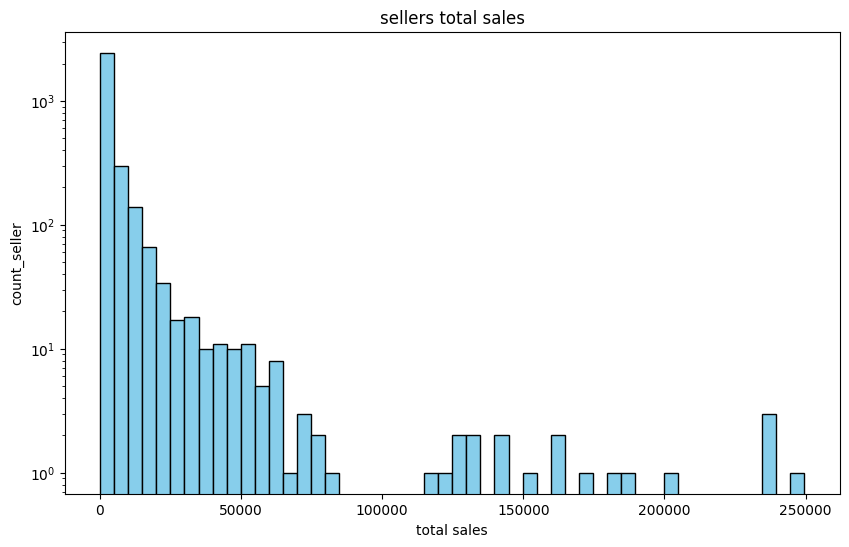

In [110]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.hist(seller_sales['total_sales'], bins=50, color='skyblue', edgecolor='black')
plt.title('sellers total sales')
plt.xlabel('total sales')
plt.ylabel('count_seller')
plt.yscale('log')  # 극단값 많으면 로그 스케일로 보기
plt.show()


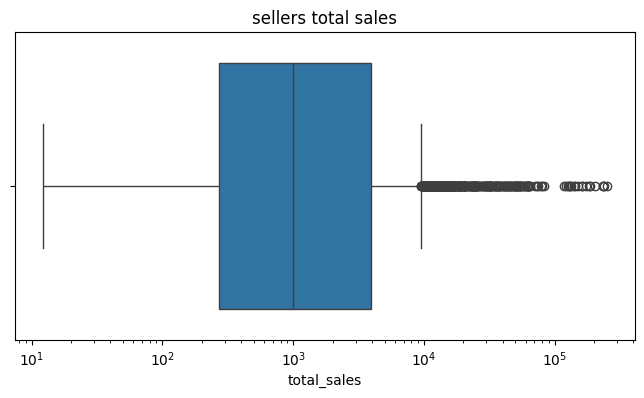

In [111]:
import seaborn as sns

plt.figure(figsize=(8,4))
sns.boxplot(x=seller_sales['total_sales'])
plt.title('sellers total sales')
plt.xscale('log')  # 큰 값이 있으면 로그 스케일 추천
plt.show()


작은 가격 이상치 없음  
매우 고가 상품은 상치 처럼 보일 수 있지만, 실제로 특정 카테고리에서 정상적인 범위이기 때문에 카테고리별 평균과 분포 확인필요

In [112]:
# 매출 제일 높은 셀러 카테고리 확인

target_seller = '4869f7a5dfa277a7dca6462dcf3b52b2'

target_seller = merge_df[merge_df['seller_id'] == target_seller]
target_seller['product_category_name'].value_counts()

,count
product_category_name,
relogios_presentes,1002
audio,56
cool_stuff,54
beleza_saude,20
eletronicos,10
consoles_games,7
telefonia,3
informatica_acessorios,2
esporte_lazer,1


-> 최고의 셀러는 시계 및 선물 카테고리를 많이 판매 했군, 고가 상품? 이런듯